In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 



c:\Users\soods\anaconda3\envs\python_project_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_US_DA= df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == 'United States')].copy()

In [4]:
df_US_DA.dropna(subset=['salary_year_avg'], inplace= True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [7]:
df_US_DA= df_US_DA.explode(column='job_skills')

In [9]:
df_US_DA_group = df_US_DA.groupby('job_skills').agg(
    count_of_job = ('job_skills','count'),
    median_sal = ('salary_year_avg','median')
)

df_US_DA_group

,count_of_job,median_sal
job_skills,,
airflow,387,116250.00
airtable,36,90000.00
alteryx,2045,106281.25
angular,129,107500.00
ansible,48,159640.00
...,...,...
workfront,29,75000.00
wrike,14,75000.00
xamarin,1,NaN


In [26]:
top10_count = df_US_DA_group.sort_values( by= 'count_of_job', ascending= False).head(10).sort_values( by= 'median_sal', ascending= False)

top10_count 

,count_of_job,median_sal
job_skills,,
python,18382,97500.00
oracle,5109,96923.75
tableau,19311,92875.00
r,11659,92500.00
sql,34452,91000.00
sas,13200,90000.00
power bi,11630,90000.00
powerpoint,7175,85000.00
excel,27519,84392.00


In [16]:
top10_median_sal =df_US_DA_group.sort_values(by='median_sal', ascending= False).head(10)

top10_median_sal

,count_of_job,median_sal
job_skills,,
dplyr,13,196250.0
bitbucket,97,189000.0
gitlab,96,186000.0
solidity,11,179000.0
hugging face,2,175000.0
couchbase,11,160515.0
ansible,48,159640.0
mxnet,7,149000.0
cassandra,87,148250.0


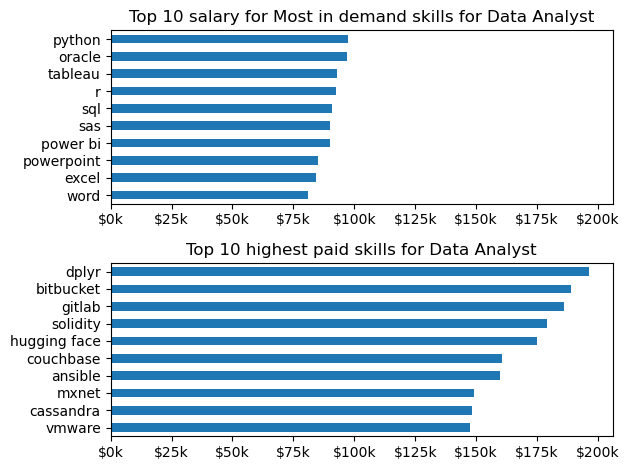

In [40]:
fig , ax = plt.subplots(2,1)

top10_count.plot(kind= 'barh' , y='median_sal', ax=ax[0], legend= False)
top10_median_sal.plot(kind= 'barh' , y='median_sal', ax=ax[1], legend = False)

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_xlim(ax[1].get_xlim())

ax[0].set_title('Top 10 salary for Most in demand skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))

ax[1].set_title('Top 10 highest paid skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))


fig.tight_layout()